<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/20_Ensemble_Trees_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

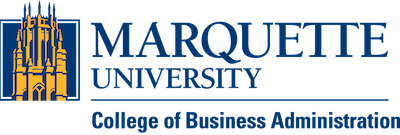

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Ensemble Trees Using R

Instructor: Dr. Badar Al Lawati

Import the data from the HELOC_Data worksheet of the HELOC data file into a data frame (table) and label it myData

In [1]:
install.packages("readxl")
library(readxl)

myData <- read_excel("/content/HELOC.xlsx", sheet = "HELOC_Data")
myData

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Age,Sex,Income,HELOC
<dbl>,<chr>,<dbl>,<dbl>
30,Female,101000,0
25,Male,86000,0
20,Male,50000,0
26,Male,58000,0
18,Female,93000,0
38,Male,153000,0
61,Male,71000,1
27,Male,102000,0
38,Male,33000,1


Install and load the caret, gains, pROC, and randomForest
packages

In [2]:
install.packages("caret")
install.packages("gains")
install.packages("pROC")
install.packages("randomForest")

library(caret)
library(gains)
library(pROC)
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The

Because the randomForest package requires that all categorical
variables be declared as factor variables explicitly, we use the
as.factor function to convert the categorical target variable,

HELOC, and categorical predictor variable, Sex, into factor
variables

In [3]:
myData$HELOC <- as.factor(myData$HELOC)
myData$Sex <- as.factor(myData$Sex)

We partition the data into training (60%) and validation (40%)
data sets.

By setting the random seed to 1, you will generate the same partitions as shown in this example

In [4]:
set.seed(1)
myIndex <- createDataPartition(myData$HELOC, p=0.6, list = FALSE)
trainSet <- myData[myIndex,]
validationSet <- myData[-myIndex,]

We first use the randomForest function to construct the ensemble
tree model using the bagging strategy.

We set the ntree option
equal to 100, which tells the function to build 100 single-tree
models.

As there are three predictor variables in the data, we set
the mtry option equal to 3, which uses all three predictor variables
in each single-tree model; this also indicates that we are using the
bagging strategy.

We set the importance option equal to TRUE to
produce the feature importance information.

Again, by setting the
random seed to 1, R will use the same randomly selected data
partitions to build the single-tree models as in this example;
therefore, you will get the same results as in this example.

In [5]:
set.seed(1)
bagging_tree <- randomForest(HELOC ~ ., data=trainSet, ntree = 100, mtry = 3, importance = TRUE)

To display the feature importance information, use the varImpPlot
function to display feature importance graphically.

We set the type option equal to 1 to show the feature importance in terms of the
average (mean) decrease in overall accuracy. (If we set the type
option equal to 2, then R uses the average decrease in the Gini
impurity index to compare the feature importance).

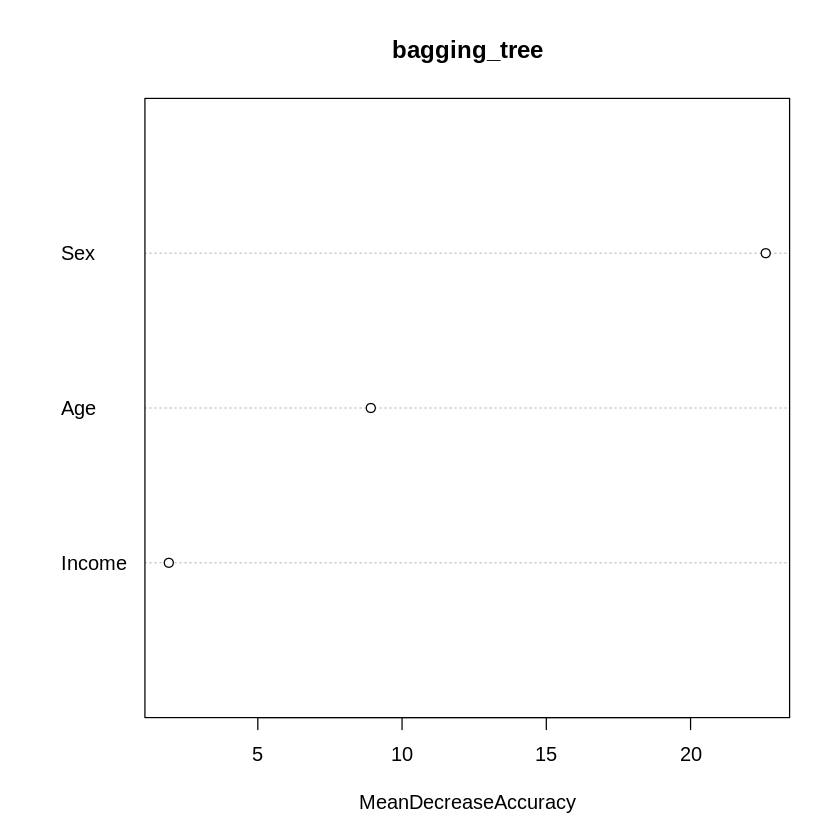

In [6]:
varImpPlot(bagging_tree, type=1)

As you can see the most important predictor
variable is Sex as the model suffers the most decrease in
classification accuracy if this predictor variable is dropped.

The
second most important predictor variable is Age

In [8]:
# The following commands create the confusion matrix by
# comparing the predicted class memberships and actual class
# memberships of the validation data set

predicted_class <- predict(bagging_tree, validationSet)
confusionMatrix(predicted_class, validationSet$HELOC, positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 125  17
         1  23  35
                                          
               Accuracy : 0.8             
                 95% CI : (0.7378, 0.8531)
    No Information Rate : 0.74            
    P-Value [Acc > NIR] : 0.02937         
                                          
                  Kappa : 0.499           
                                          
 Mcnemar's Test P-Value : 0.42920         
                                          
            Sensitivity : 0.6731          
            Specificity : 0.8446          
         Pos Pred Value : 0.6034          
         Neg Pred Value : 0.8803          
             Prevalence : 0.2600          
         Detection Rate : 0.1750          
   Detection Prevalence : 0.2900          
      Balanced Accuracy : 0.7588          
                                          
       'Positive' Class : 1               
                              

The performance measures show that the bagging ensemble tree
model has an overall accuracy rate of 80% on the validation data.

As shown earlier, the model is much better at classifying Class 0
cases correctly (specificity = 0.8851) than at classifying Class 1
cases correctly (sensitivity = 0.5577).

Depth                            Cume   Cume Pct                     Mean
 of           Cume     Mean      Mean   of Total    Lift   Cume     Model
File     N      N      Resp      Resp      Resp    Index   Lift     Score
-------------------------------------------------------------------------
  10    21     21      0.67      0.67      26.9%     256    256      0.95
  20    20     41      0.55      0.61      48.1%     212    235      0.81
  30    19     60      0.58      0.60      69.2%     223    231      0.60
  41    21     81      0.43      0.56      86.5%     165    214      0.35
  50    19    100      0.11      0.47      90.4%      40    181      0.20
  60    21    121      0.10      0.40      94.2%      37    156      0.06
  72    23    144      0.13      0.36     100.0%      50    139      0.02
 100    56    200      0.00      0.26     100.0%       0    100      0.00
  NA    NA     NA        NA        NA        NA%      NA     NA        NA
  NA    NA     NA        NA        NA 

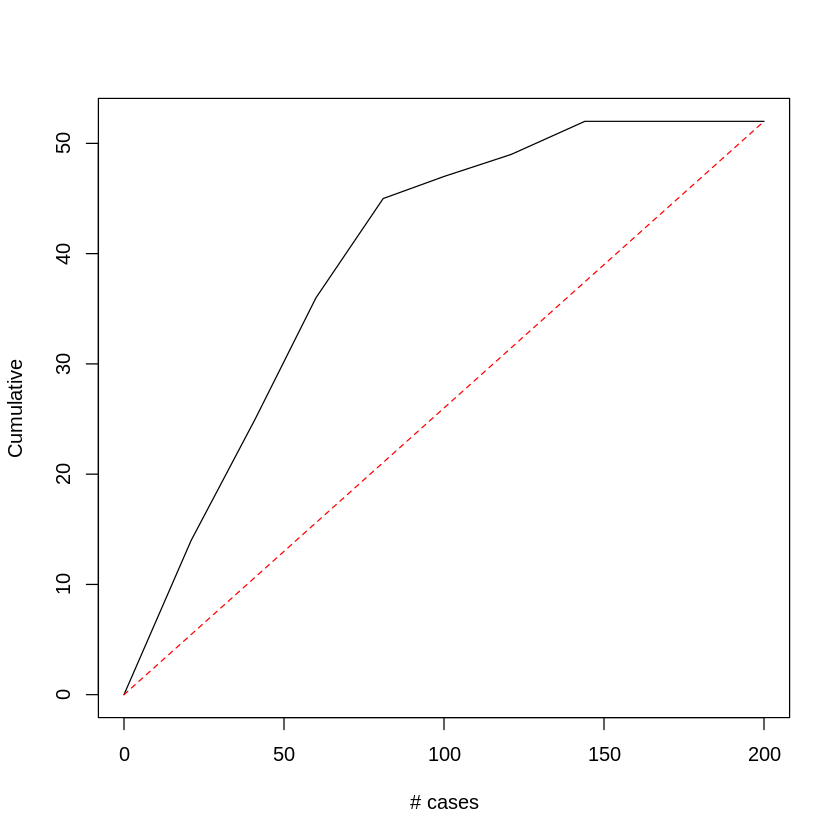

Setting levels: control = 0, case = 1

Setting direction: controls < cases



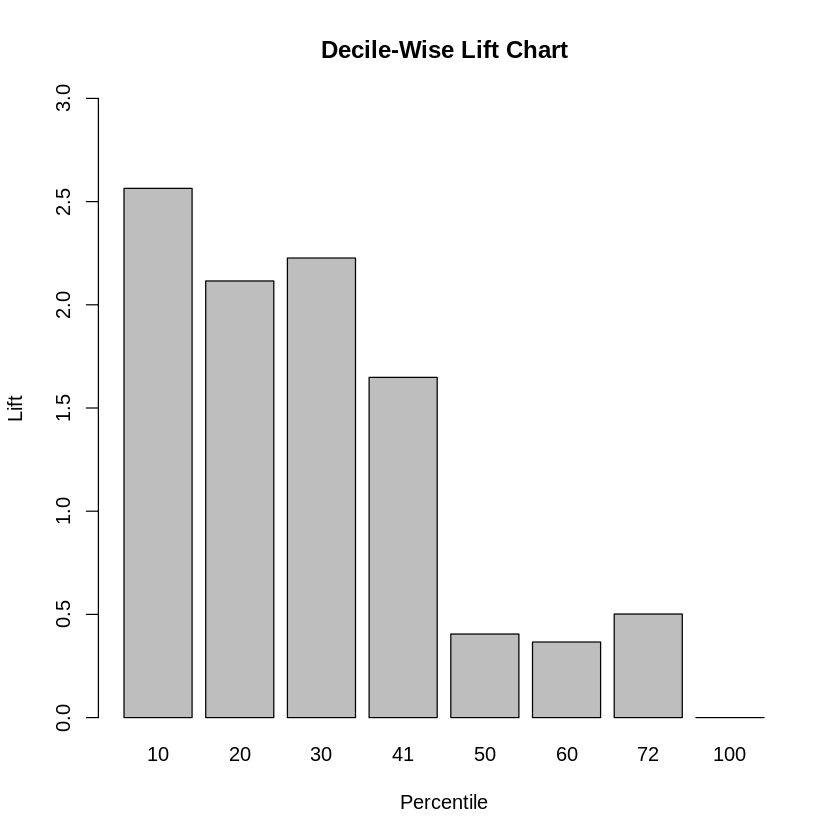

Area under the curve: 0.8607

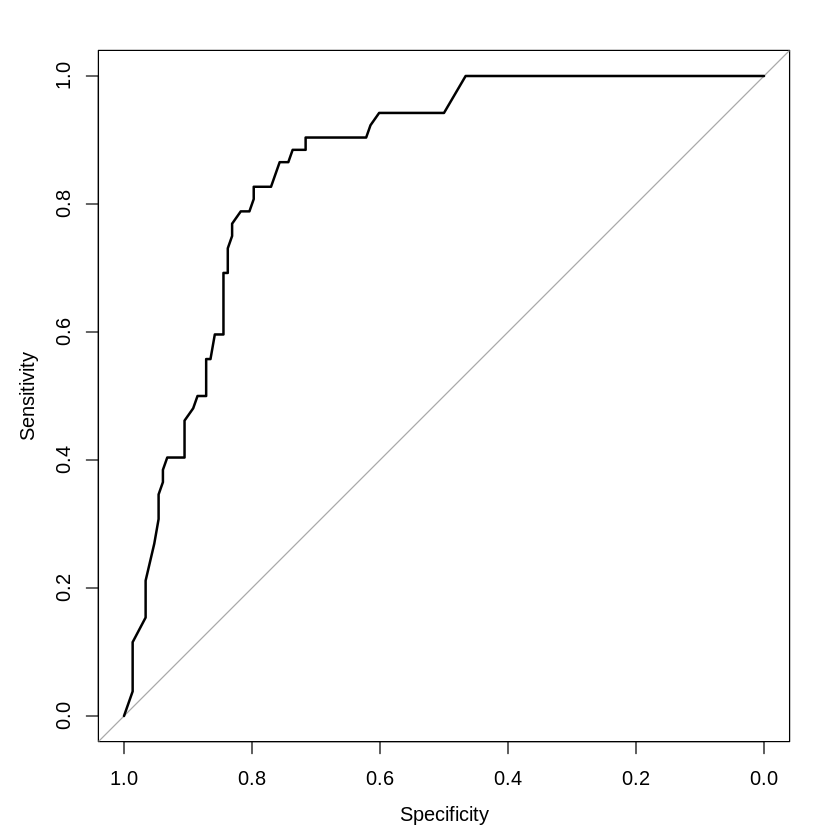

In [13]:
# Let's create the cumulative lift chart, the
# decile-wise lift chart, and the ROC curve

predicted_prob<- predict(bagging_tree, validationSet, type="prob")
validationSet$HELOC <- as.numeric(as.character(validationSet$HELOC))
gains_table <- gains(validationSet$HELOC, predicted_prob[,2])
gains_table

plot(c(0, gains_table$cume.pct.of.total*sum(validationSet$HELOC)) ~ c(0, gains_table$cume.obs),xlab = "# cases", ylab="Cumulative", type ="l")
lines(c(0, sum(validationSet$HELOC)) ~ c(0, dim(validationSet)[1]), col="red", lty=2)

barplot(gains_table$mean.resp/mean(validationSet$HELOC), names.arg=gains_table$depth, xlab="Percentile", ylab="Lift", ylim=c(0, 3), main = "Decile-Wise Lift Chart")

roc_object<- roc(validationSet$HELOC, predicted_prob[,2])

plot.roc(roc_object)

auc(roc_object)

The cumulative lift
chart shows that the lift curve lies well above the diagonal line,
indicating that the model performs considerably better than the
baseline model in terms of predicting whether or not a customer
will respond to the HELOC offer.

The decile-wise lift chart also
suggests good model performance, indicated by the high lift
values for the first couple of bars and a gradual decline as more
cases are drawn.

The ROC curve shows that the model
outperforms the baseline model in terms of both sensitivity and specificity across all cutoff values. The area under the ROC curve,
or AUC, is high (0.8425).

Overall, the bagging ensemble tree
model provides a slight improvement in the predictive
performance as compared to the single-tree classification model
produced earlier

Finally, to score the 20 new cases, we import the data from the
HELOC_Score worksheet of the HELOC data file into a data
frame (table) called myScoreData and use the predict function to
produce the predicted class memberships and probabilities for the
new cases using the bagging ensemble tree.

We first convert the
categorical predictor variable, Sex, to a factor variable so that it is
consistent with the Sex variable in the bagging tree model created earlier

In [16]:
myScoreData <- read_excel("/content/HELOC.xlsx", sheet = "HELOC_Score")
myScoreData$Sex <- as.factor(myScoreData$Sex)
predicted_class_score <- predict(bagging_tree, myScoreData, type="class")
predicted_class_score

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  1  1  0  1 
Levels: 0 1

In [18]:
predicted_class_prob <- predict(bagging_tree, myScoreData, type="prob")
predicted_class_prob

,0,1
1,1.00,0.00
2,0.99,0.01
3,1.00,0.00
4,1.00,0.00
5,0.72,0.28
6,1.00,0.00
7,0.99,0.01
8,1.00,0.00
9,1.00,0.00
10,1.00,0.00


In [19]:
# To create an ensemble tree model using the random forest strategy

set.seed(1)
randomforest_tree <- randomForest(HELOC ~ ., data=trainSet, ntree= 100, mtry = 2, importance = TRUE)

As you can see, the only difference between the commands for
bagging and random forest is the number you specify for the mtry
option in the randomForest function.

Because random forest selects
a subset of the predictor variables for building each single-tree
model, we specify the number of predictor variables to include in
the subset.

In this case, we ask the function to randomly select two
predictor variables for building individual single-tree models.

The
random forest model results are similar to that of the bagging tree in
this case.

Sex is found to be the most influential predictor, followed
by Age as a distant second.

Using the cutoff value of 0.5, the random forest model results in an overall accuracy of 0.78,
sensitivity of 0.50, and specificity of 0.8784.


### Boosting

R uses the boosting function of the adabag package to create
ensemble tree models that implement the boosting strategy.

Due to
the technical requirements of the adabag package, we create the
boosting tree model slightly differently

In [20]:
install.packages("adabag")

library(adabag)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘rgl’, ‘rlist’, ‘gtools’, ‘doParallel’, ‘ConsRank’


Loading required package: rpart

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



Because the adabag package requires the use of data frame class
objects, we convert myData to a data frame class object using the
data.frame function.

We convert categorical variables (i.e., Sex
and HELOC) to factor variables as required by the software.

In [21]:
myData <- data.frame(myData)
myData$HELOC <- as.factor(myData$HELOC)
myData$Sex <- as.factor(myData$Sex)

We set the random seed to 1 and partition the data into training
(60%) and validation (40%) data sets.

In [22]:
set.seed(1)
myIndex <- createDataPartition(myData$HELOC, p=0.6, list = FALSE)
trainSet <- myData[myIndex,]
validationSet <- myData[-myIndex,]

We use the boosting function to construct the ensemble tree
model using the boosting strategy.

By setting the random seed to
1, you will get the same results as in this example.

The mfinal
option specifies the number of weak learners (single-tree models)
to create

In [23]:
set.seed(1)
boosting_tree <- boosting(HELOC ~ ., data=trainSet, mfinal = 100)

Now, create the confusion matrix by
comparing the predicted class memberships and actual class
memberships of the validation data set.

For boosting tree models, the predict function produces a list (named prediction here),
which includes predicted class memberships and probabilities.
You can access the predicted class memberships and predicted
probabilities using prediction$class and prediction$prob,
respectively.

In [25]:
prediction <- predict(boosting_tree, validationSet)
confusionMatrix(as.factor(prediction$class), validationSet$HELOC, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 123  22
         1  25  30
                                       
               Accuracy : 0.765        
                 95% CI : (0.7, 0.8219)
    No Information Rate : 0.74         
    P-Value [Acc > NIR] : 0.2360       
                                       
                  Kappa : 0.4005       
                                       
 Mcnemar's Test P-Value : 0.7705       
                                       
            Sensitivity : 0.5769       
            Specificity : 0.8311       
         Pos Pred Value : 0.5455       
         Neg Pred Value : 0.8483       
             Prevalence : 0.2600       
         Detection Rate : 0.1500       
   Detection Prevalence : 0.2750       
      Balanced Accuracy : 0.7040       
                                       
       'Positive' Class : 1            
                                       

Using the default cutoff value of
0.5, the boosting ensemble tree shows the same predictive
performance as the bagging ensemble tree does

Now, create the cumulative lift chart, the
decile-wise lift chart, and the ROC curve. As the syntax for
creating these graphs has been discussed in previous sections, we
will not repeat it here. Note that we access the predicted
probability of a validation case belonging to Class 1 (target class)
using prediction$prob[, 2] because the Class 1 probabilities are
listed in the second column of the object.

Depth                            Cume   Cume Pct                     Mean
 of           Cume     Mean      Mean   of Total    Lift   Cume     Model
File     N      N      Resp      Resp      Resp    Index   Lift     Score
-------------------------------------------------------------------------
  10    20     20      0.65      0.65      25.0%     250    250      0.71
  20    20     40      0.55      0.60      46.2%     212    231      0.61
  30    20     60      0.45      0.55      63.5%     173    212      0.53
  40    20     80      0.60      0.56      86.5%     231    216      0.44
  50    20    100      0.15      0.48      92.3%      58    185      0.37
  60    20    120      0.05      0.41      94.2%      19    157      0.33
  70    20    140      0.05      0.36      96.2%      19    137      0.29
  80    20    160      0.05      0.32      98.1%      19    123      0.25
  90    20    180      0.05      0.29     100.0%      19    111      0.20
 100    20    200      0.00      0.26 

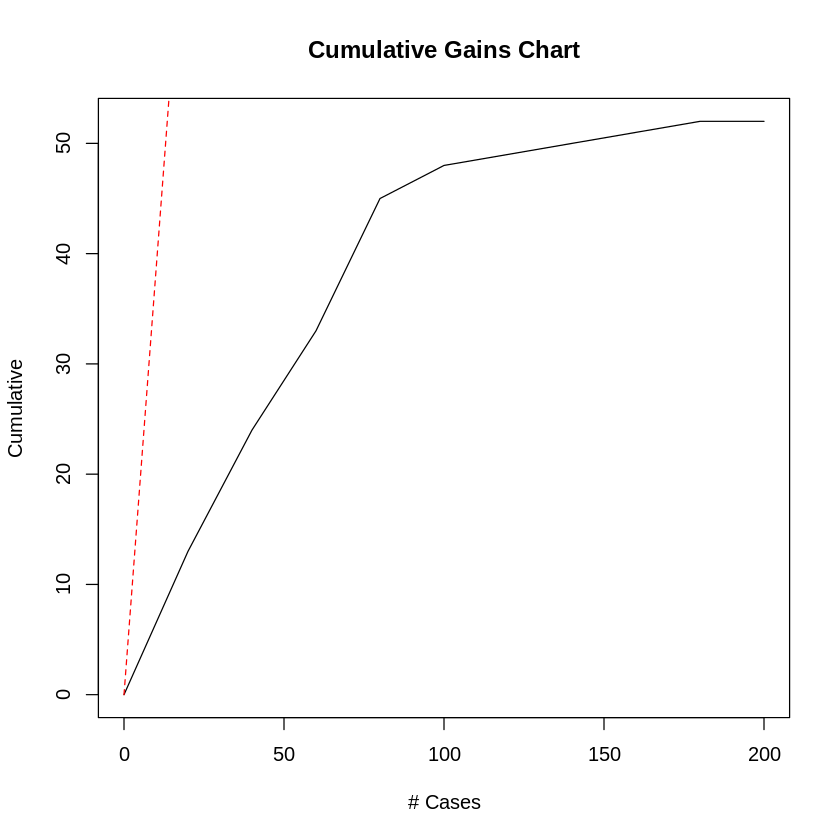

Setting levels: control = 0, case = 1

Setting direction: controls < cases



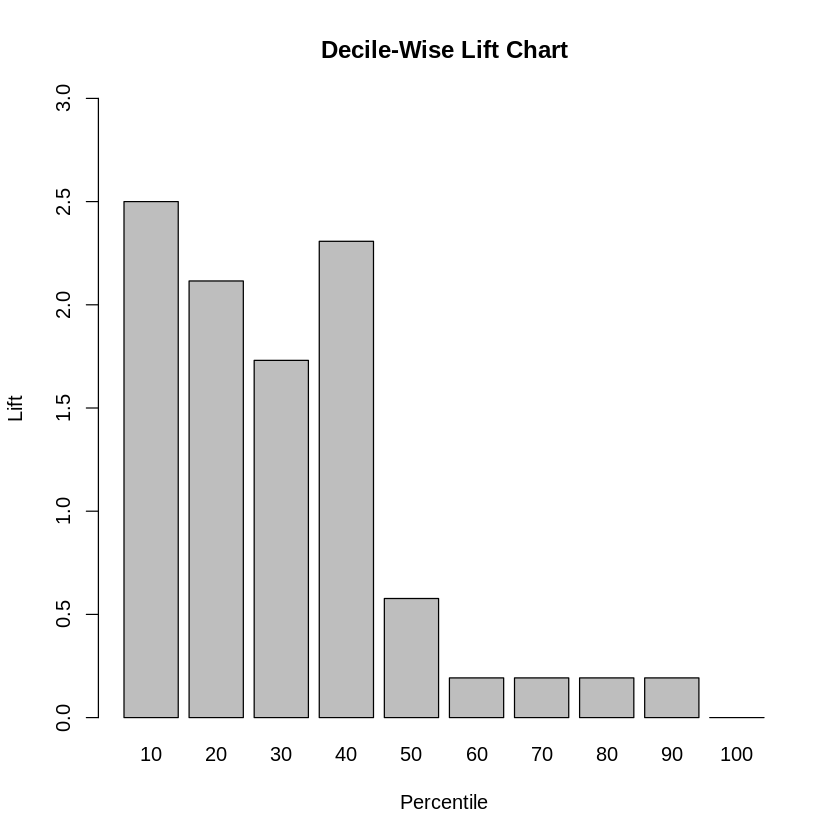

Area under the curve: 0.8418

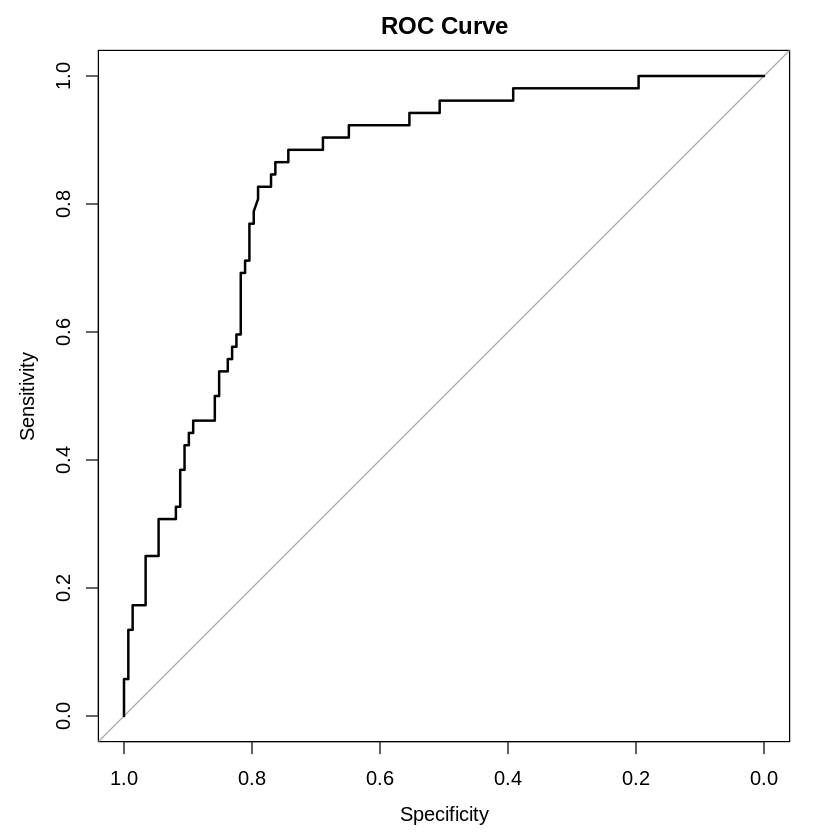

In [28]:
# Convert HELOC to numeric (if needed)
validationSet$HELOC <- as.numeric(as.character(validationSet$HELOC))

# Generate gains table
gains_table <- gains(validationSet$HELOC, prediction$prob[,2])
print(gains_table)

# Plot cumulative gains chart
plot(c(0, gains_table$cume.obs),
     c(0, gains_table$cume.pct.of.total * sum(validationSet$HELOC)),
     xlab = "# Cases",
     ylab = "Cumulative",
     type = "l",
     main = "Cumulative Gains Chart")

# Add reference line
lines(c(0, sum(validationSet$HELOC)),
      c(0, dim(validationSet)[1]),
      col = "red",
      lty = 2)

# Decile-wise lift chart
barplot(gains_table$mean.resp / mean(validationSet$HELOC),
        names.arg = gains_table$depth,
        xlab = "Percentile",
        ylab = "Lift",
        ylim = c(0, 3),
        main = "Decile-Wise Lift Chart")

# ROC Curve and AUC
roc_object <- roc(validationSet$HELOC, prediction$prob[,2])
plot.roc(roc_object, main = "ROC Curve")
auc(roc_object)

In [29]:
# Finally, to score the 20 new cases, we import the data from the
# HELOC_Score worksheet of the HELOC data file into a data
# frame (table) and label it myScoreData. Convert myScoreData to
# a data frame class object and predictor variable Sex to a factor
# variable as required by the software.

myScoreData <- read_excel("/content/HELOC.xlsx", sheet = "HELOC_Score")
myScoreData <- data.frame(myScoreData)
myScoreData$Sex <- as.factor(myScoreData$Sex)
predicted_class_score <- predict(boosting_tree, myScoreData)

In [30]:
predicted_class_score$class
predicted_class_score$prob

[1] "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "1" "0" "0" "1" "0" "0" "1" "1" "0"
[20] "0"

0.7063553,0.2936447
0.6758055,0.3241945
0.7506491,0.2493509
0.7548101,0.2451899
0.7098090,0.2901910
0.8152275,0.1847725
0.6530127,0.3469873
0.6960482,0.3039518
0.6960482,0.3039518
0.7975866,0.2024134
0.4078735,0.5921265


The scoring results of the boosting ensemble model are slightly
different from those of the bagging ensemble model; the 20th case
is classified as a Class 0 case by the boosting model, whereas it is
classified as a Class 1 case by the bagging model.

As discussed
before, unlike the bagging and random forest models, the boosting
model does not provide variable importance information.